# Wavelets

This page serves as a reference for the different types of wavelets baked into the examples module and provides a recipe for creating your own.

The wavelets at a bare minimum require the following parameters to be provided:

| Parameter name | Symbol | Description |
|----------------|--------|-------------|
| Amplitude      | $A$    | Maximum displacement from zero |
| Peak frequency | $f$    | The dominant frequency of the wave |
| Center         | $t_0$  | The $t$ value where the wave attains its maximum displacement |

Other wavelets may require additional parameters.

**TODO**:
- Add description of wavelet
- Describe parameterisation
- Add default parameters and description
- Explain and describe defaults
- Note deprecated routines

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import examples.seismic.source as s


sympy.init_printing(use_latex='mathjax')

We use the following function to provide a plot of the profile of each wavelet and its spectrum.

In [2]:
def plot_wavelet(t, data, envelope=None):
    N = t.size
    T = t[-1]
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    fig.tight_layout()
    
    ax[0].plot(t, data)
    if envelope is not None:
        ax[0].plot(t, envelope, 'k--')
    ax[0].set_xlim(0, 0.2)
    ax[0].set_ylim(-1.05, 1.05)
    ax[0].set_xlabel('Time t')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Wavelet')
    
    abcissa = sp.fft.fftfreq(N, T/N)
    ax[1].plot(abcissa[:N//2], (1/N)*np.abs(sp.fft.fft(data)[:N//2]))
    ax[1].set_xlim(0, 100)
    ax[1].set_ylim(0, None)
    ax[1].set_xlabel('Frequency f = 1/t')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Spectrum')

    fig.subplots_adjust(wspace=0.25)

    return fig, ax

Throughout this notebook we will use the following parameters, so the form of the wavelet can be compared.

In [3]:
# Parameters
f0 = 30
N = 1000
T = 20/f0
gamma = 3

# Time period over which the wavelet is plotted
t = np.linspace(0, T, 1001)

## The Gaussian soliton
The first wave profile that we consider is the Gaussian function, which is not a wavelet. We make the distinction clear by refering to it as a soliton.
Since the Fourier transform of a Gaussian is also a Gaussian we cannot change the peak frequency, the peak frequency is always zero.

To make the distinction clear we use the parameter $b$ in place of $f$ for describing the parameterisation.
$A$ and $t_0$ remain the same.

The function requires the following parameter:

| Parameter name | Symbol | Description |
|----------------|--------|-------------|
| Width          | $b$    | Defines the width of the Gaussian |

The mathematical expression for a Gaussian can be written as:

In [4]:
s.gauss

     2         2
   -b ⋅(t - t₀) 
A⋅ℯ             

To ensure that the majority (more than 99%) of the soliton appears in the resultant array, the default value of $t_0$ is chosen to be $3/(f\sqrt{2})$ which corresponds to three standard deviations from the peak.
The user may change this value at construction time to move the peak either to the left or to the right.

Plotting the array we can see the bell shaped curve of the Gaussian soliton on the left and on the right we plot the frequency spectrum.
The spectrum also takes the form of a Gaussian, centred on zero.

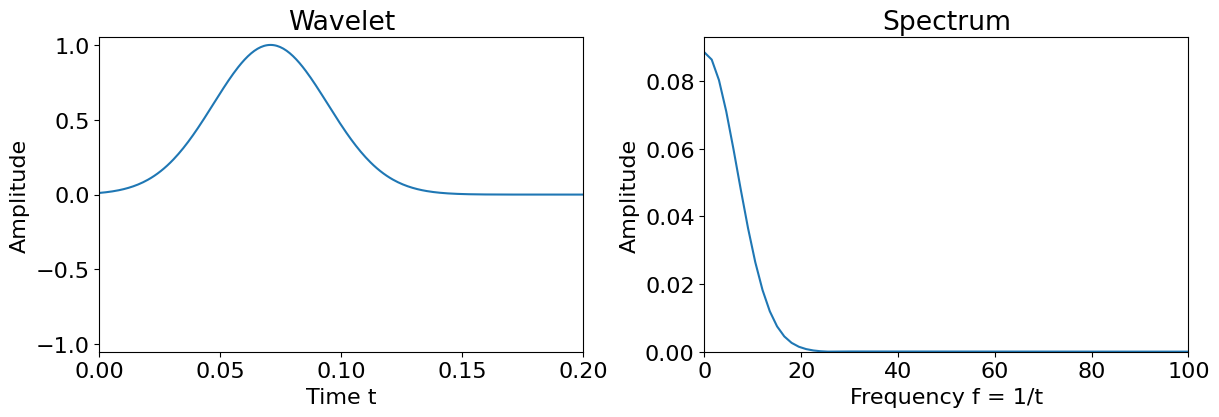

In [5]:
gauss_data = s.wavelet['gauss_soliton'](t, f0)
_ = plot_wavelet(t, gauss_data)

## Gaussian derivative wavelet
The first family of wavelets that we look at is the derivatives of the Gaussian soliton.

It is the case that for any $n \in \mathbb{N}_{>0}$, $\frac{d^n}{dt^n} \Phi(t; A, b, t_0)$ is a wavelet.
Here $\Phi$ is the parameterised representation of the Gaussian soliton defined above.

The Gaussian derivatives wavelet (sometimes written DGauss) takes the three standard parameters $A, f, t_0$ as well as:

| Parameter name | Symbol | Description |
|----------------|--------|-------------|
| Derivative     | $n$    | Number of derivatives of $\Phi$ to take |

In order to have the wavelet attain the specified peak amplitude, each derivatives is scaled.
For $n=1,2$ this is done symbolically, and for $n>2$ the constant is computed numerically and represented in the expression with the symbol $C$

For $n=1,2,3,4$ we have

In [6]:
for n in range(1,5):
    print(f'{n = }')
    display(s.dgauss(n=n))
    print()

n = 1


                            2  2         2
                   1/2  -2⋅π ⋅f ⋅(t - t₀) 
-2⋅π⋅A⋅f⋅(t - t₀)⋅ℯ   ⋅ℯ                  


n = 2


                             2  2         2
  ⎛   2  2         2    ⎞  -π ⋅f ⋅(t - t₀) 
A⋅⎝2⋅π ⋅f ⋅(t - t₀)  - 1⎠⋅ℯ                


n = 3


                                                   2  2         2 
                                               -2⋅π ⋅f ⋅(t - t₀)  
                    ⎛     2  2         2    ⎞  ───────────────────
    4    4          ⎜  4⋅π ⋅f ⋅(t - t₀)     ⎟           3         
16⋅π ⋅A⋅f ⋅(t - t₀)⋅⎜- ───────────────── + 3⎟⋅ℯ                   
                    ⎝          3            ⎠                     
──────────────────────────────────────────────────────────────────
                               9⋅C                                


n = 4


                                                     2  2         2 
                                                   -π ⋅f ⋅(t - t₀)  
                                                   ─────────────────
 4    4 ⎛ 4  4         4      2  2         2    ⎞          2        
π ⋅A⋅f ⋅⎝π ⋅f ⋅(t - t₀)  - 6⋅π ⋅f ⋅(t - t₀)  + 3⎠⋅ℯ                 
────────────────────────────────────────────────────────────────────
                                 C                                  

We can also plot the wavelet and spectrum in each case, to show the form and verify that the peak frequency is 30 Hz in each case.

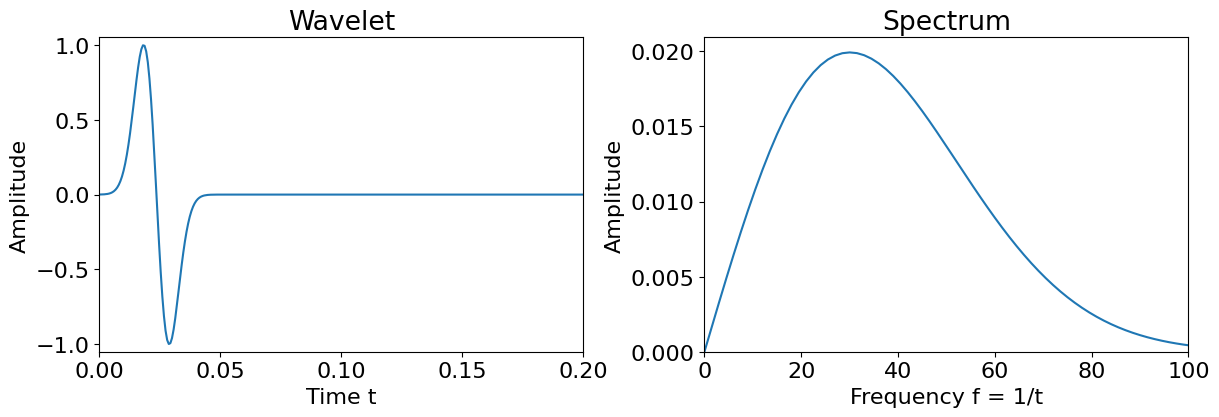

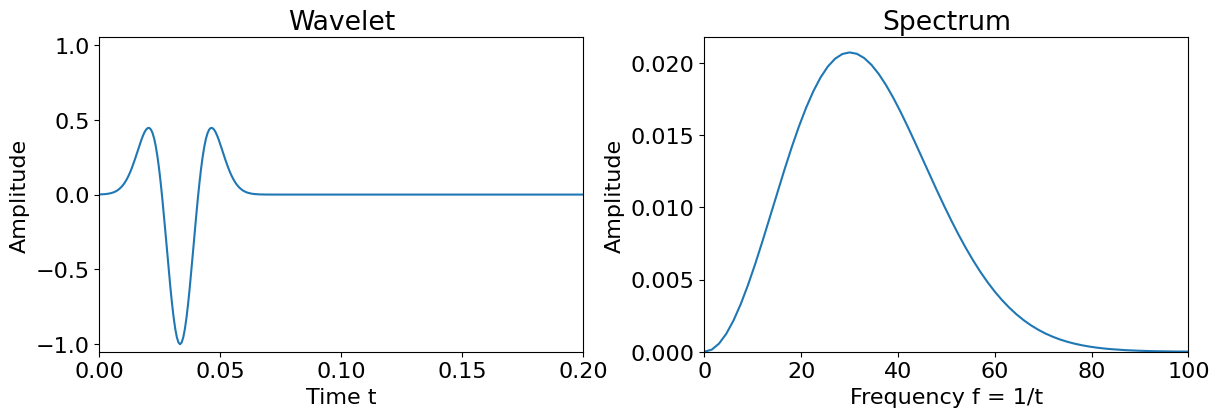

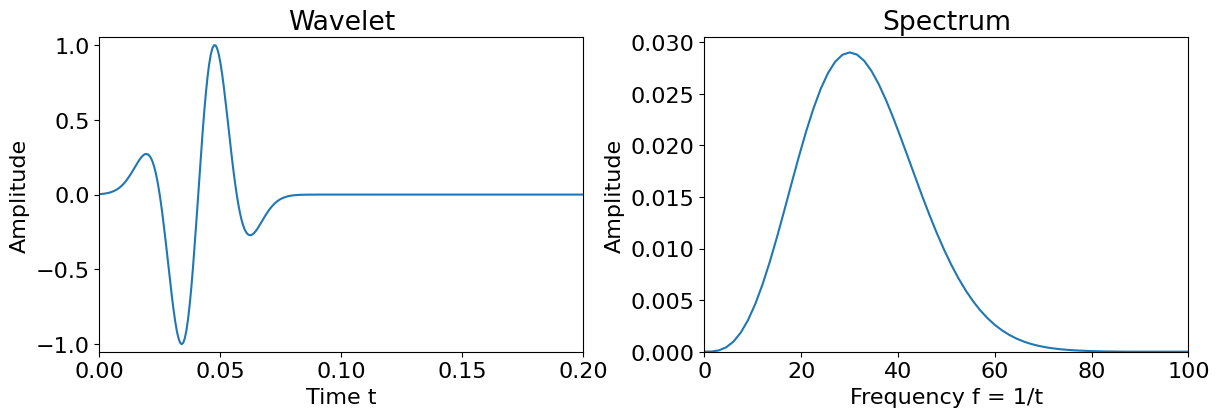

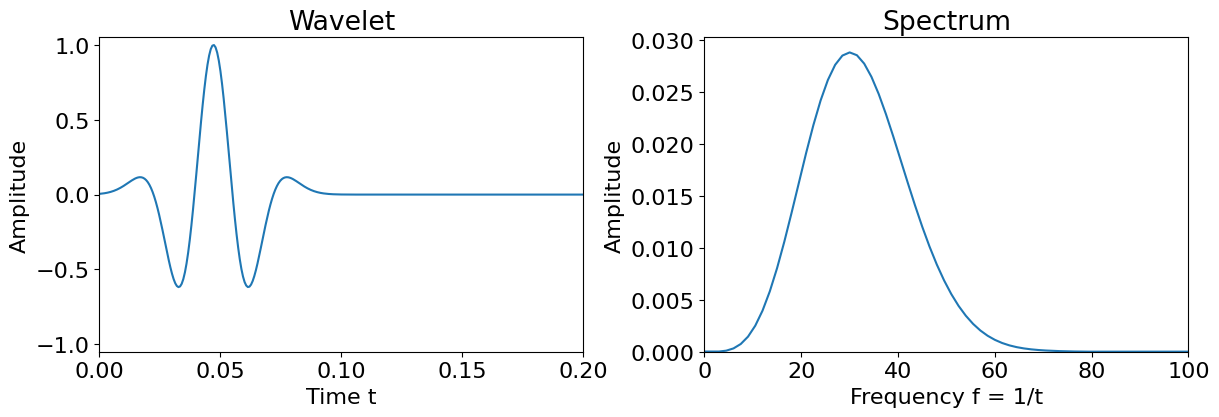

In [7]:
for n in range(1, 5):
    dgauss_data = s.wavelet['dgauss'](t, f0, A=1, n=n)
    _ = plot_wavelet(t, dgauss_data)

## The Ricker wavelet
The second derivative of the Gaussian function may look familiar, that is because (when scaled by -1) it is more commonly referred to as the Ricker wavelet.
This is one of the most commonly used wavelets in seismic imaging.

It is parameterised by the three standard parameters $A, f, t_0$ and has the form (as per the [SEG wiki](https://wiki.seg.org/wiki/Dictionary:Ricker_wavelet)):

In [8]:
s.ricker

                              2  2         2
   ⎛   2  2         2    ⎞  -π ⋅f ⋅(t - t₀) 
-A⋅⎝2⋅π ⋅f ⋅(t - t₀)  - 1⎠⋅ℯ                

We plot the Ricker wavelet and its spectrum:

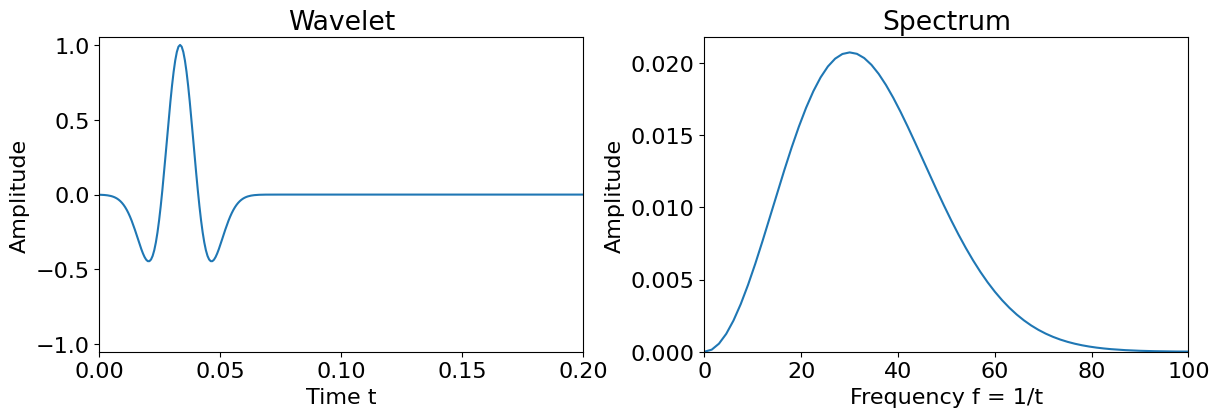

In [9]:
ricker_data = s.wavelet['ricker'](t, f0)
_ = plot_wavelet(t, ricker_data)

## The Gabor wavelet

The final wavelet that we examine is the Gabor wavelet, which takes two additional parameters:

| Parameter name | Symbol   | Description |
|----------------|----------|-------------|
| Gamma          | $\gamma$ | Number of peaks (approximately) |
| Phase shift    | $\phi$   | The offset applied to cosine |

The Gabor wavelet is defined to be (as per the [SEG wiki](https://wiki.seg.org/wiki/Dictionary:Gabor_wavelet)):

In [10]:
s.gabor

     2  2         2                         
   -π ⋅f ⋅(t - t₀)                          
   ─────────────────                        
           2                                
          𝛾                                 
A⋅ℯ                 ⋅cos(2⋅π⋅f⋅(t - t₀) + 𝜙)

This is the product of a Gaussian soliton and a (co-)sinusoid.

We plot the profile of the Gabor wavelet along with the envelope, which is the Gaussian solition (with appropriate dilation).
Note that this formulation ensures a peak frequency at $f$ as seen in the spectrum.

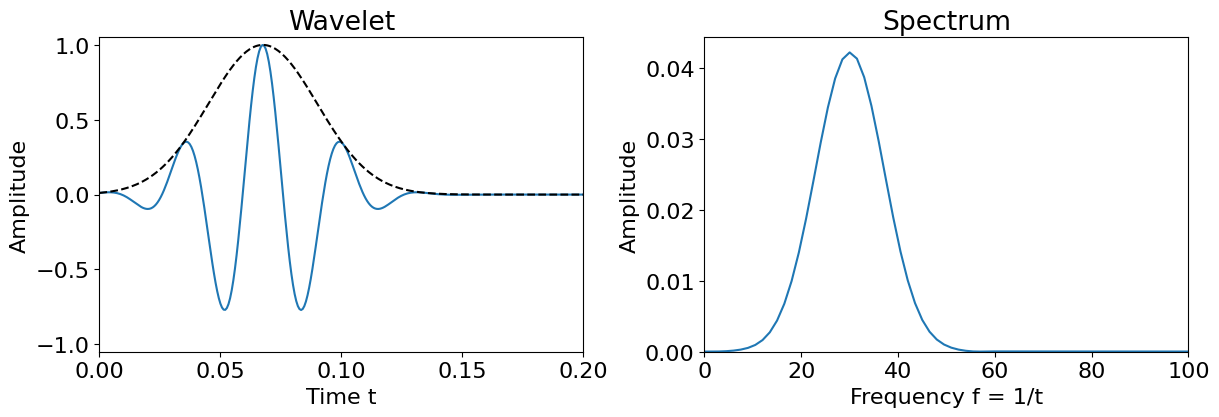

In [11]:
gabor_data = s.wavelet['gabor'](t, f0, 1, gamma=gamma)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi/gamma, 1)
_ = plot_wavelet(t, gabor_data, envelope)

Notice that the Gabor wavelet only attains its peak if there is zero phase shift.
Applying a quarter rotation phase shift maintains the peak freqency as seen in the spectrum.
However in the profile we see the wavelet does not attain the maximum amplitude of 1:

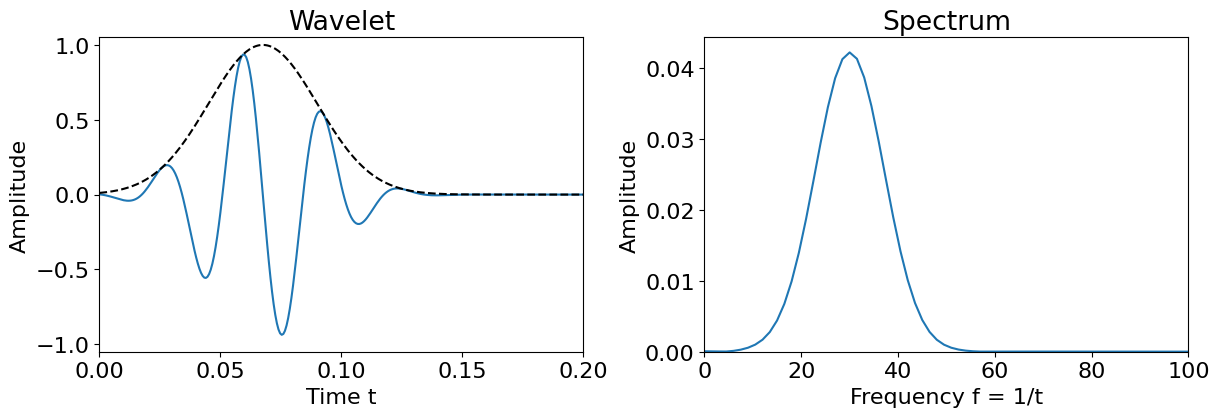

In [12]:
gabor_data = s.wavelet['gabor'](t, f0, 1, gamma=gamma, phi=np.pi/2)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi/gamma, 1)
_ = plot_wavelet(t, gabor_data, envelope)

## Custom wavelet

We can also create any custom wavelet that we like, we do this here by adding noise to a Ricker wavelet.

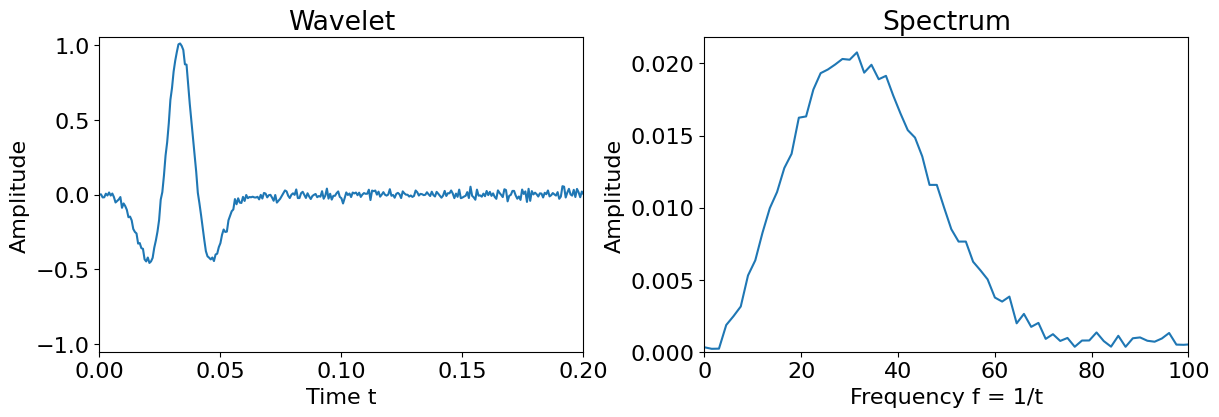

In [13]:
rng = np.random.default_rng(seed=7)
custom_data = s.wavelet['ricker'](t, f0) + np.random.normal(0, 0.02, t.shape)

_ = plot_wavelet(t, custom_data)

## Creating a wavelet source in Devito examples

If you are using the code in Devito's examples module, you can create any of the above wavelets by creating `WaveletSource`.

We show an example of constructing each here, using the `wavelet` keyword to specify the wavelet type, and additional parameters being passed as keyword arguments:

In [14]:
from devito import Grid

grid = Grid(shape=(11, 11))
time_axis = s.TimeAxis(start=0, stop=T, num=1001)

gauss = s.WaveletSource(name='Gauss', grid=grid, time_range=time_axis, wavelet='gauss_soliton', f0=f0)
dgauss = s.WaveletSource(name='DGauss', grid=grid, time_range=time_axis, wavelet='dgauss', f0=f0, n=3)
ricker = s.WaveletSource(name='Ricker', grid=grid, time_range=time_axis, wavelet='ricker', f0=f0)
gabor = s.WaveletSource(name='Gabor', grid=grid, time_range=time_axis, wavelet='gabor', f0=f0, gamma=gamma)
custom = s.WaveletSource(name='Custom', grid=grid, time_range=time_axis, wavelet=custom_data, f0=f0)

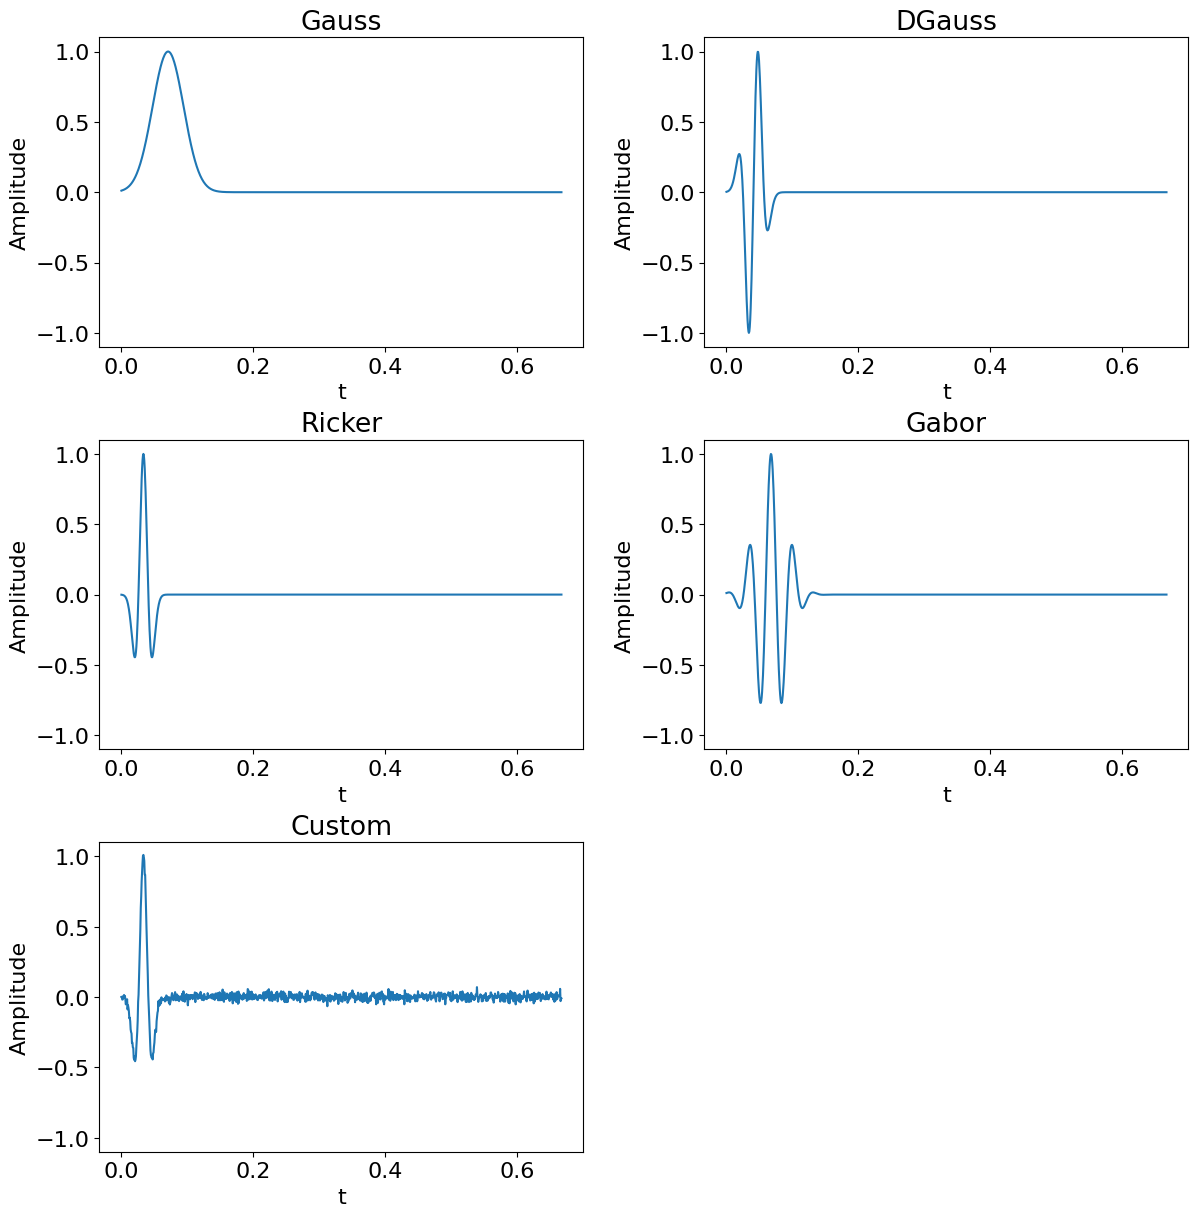

In [15]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(12, 12)
fig.tight_layout()

for axis, wavelet in zip(ax.ravel(), [gauss, dgauss, ricker, gabor, custom], strict=False):
    axis.plot(time_axis.time_values, wavelet.data)
    axis.set_title(wavelet.name)
    axis.set_xlabel('t')
    axis.set_ylabel('Amplitude')
    axis.set_ylim(-1.1, 1.1)

ax[-1, -1].remove()
fig.subplots_adjust(hspace=0.3, wspace=0.25)

## Deprecated routines

Devito also contains `RickerSource`, `DGaussSource` and `GaborSource` functions for backward compatibility.

These should be avoided as in some cases the description of the parameters did not match the constructed functions, as can be seen below as we demonstrate the legacy interface:

In [16]:
legacy_ricker = s.RickerSource(name='Legacy Ricker', grid=grid, time_range=time_axis, f0=f0)

# TODO: Work out why the OG DGauss shift is so out
legacy_dgauss = s.DGaussSource(name='Legacy DGauss', grid=grid, time_range=time_axis, a=30, f0=f0, t0=0.5)
legacy_gabor = s.GaborSource(name='Legacy Gabor', grid=grid, time_range=time_axis, f0=f0)

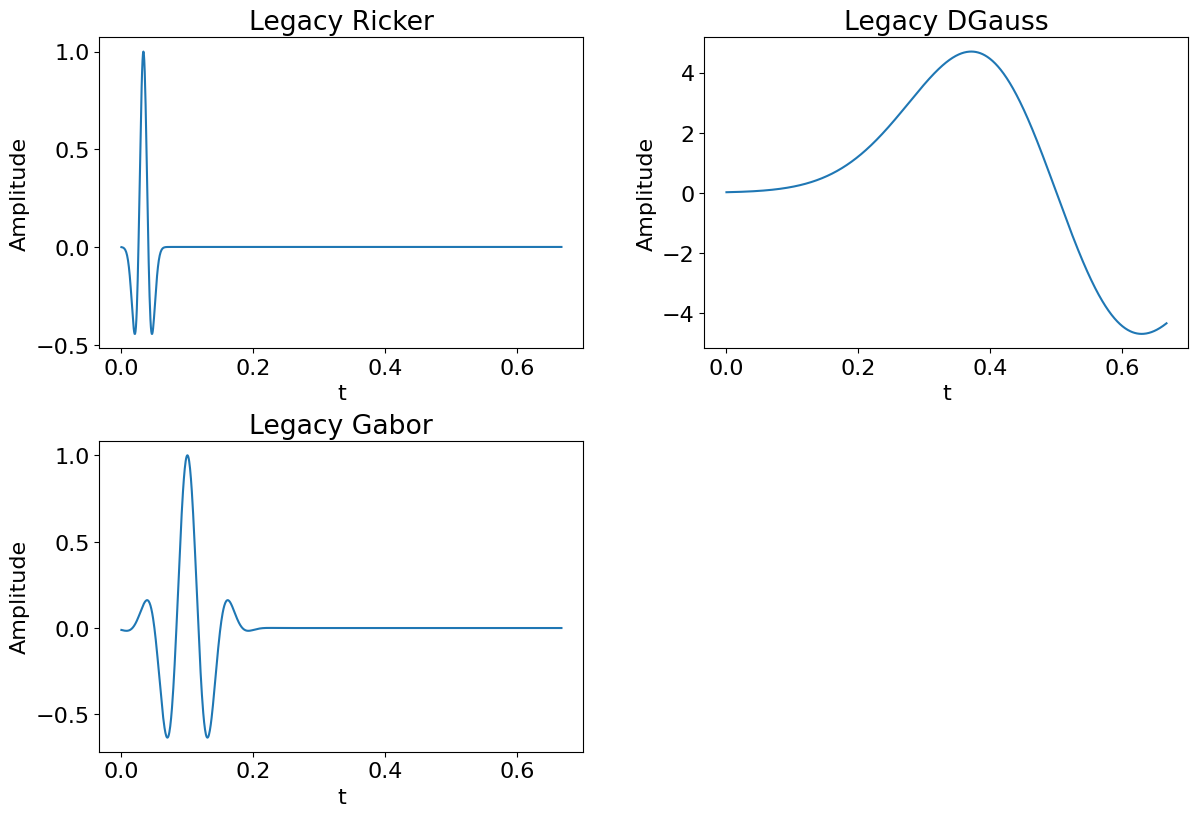

In [17]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8)
fig.tight_layout()

for axis, wavelet in zip(ax.ravel(), [legacy_ricker, legacy_dgauss, legacy_gabor], strict=False):
    axis.plot(time_axis.time_values, wavelet.data)
    axis.set_title(wavelet.name)
    axis.set_xlabel('t')
    axis.set_ylabel('Amplitude')
    #axis.set_ylim(-1.1, 1.1)

ax[-1, -1].remove()
fig.subplots_adjust(hspace=0.3, wspace=0.25)

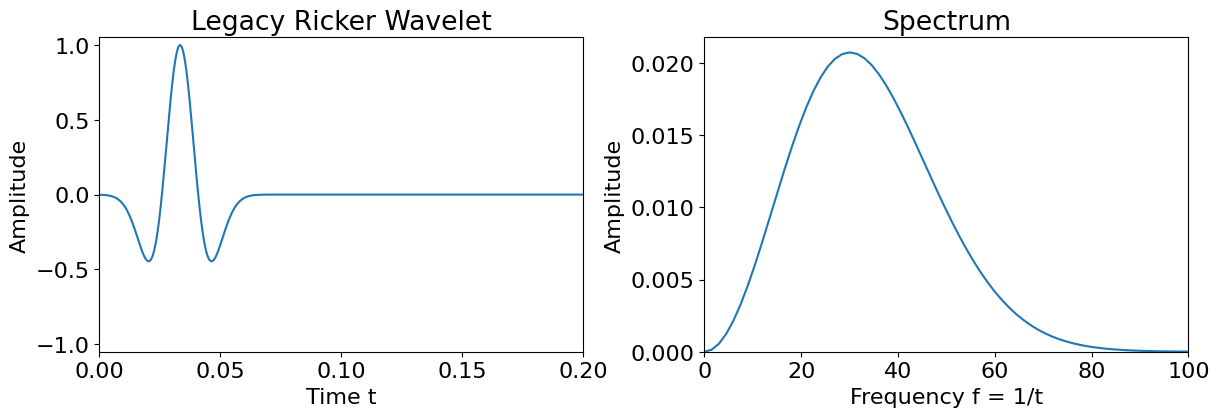

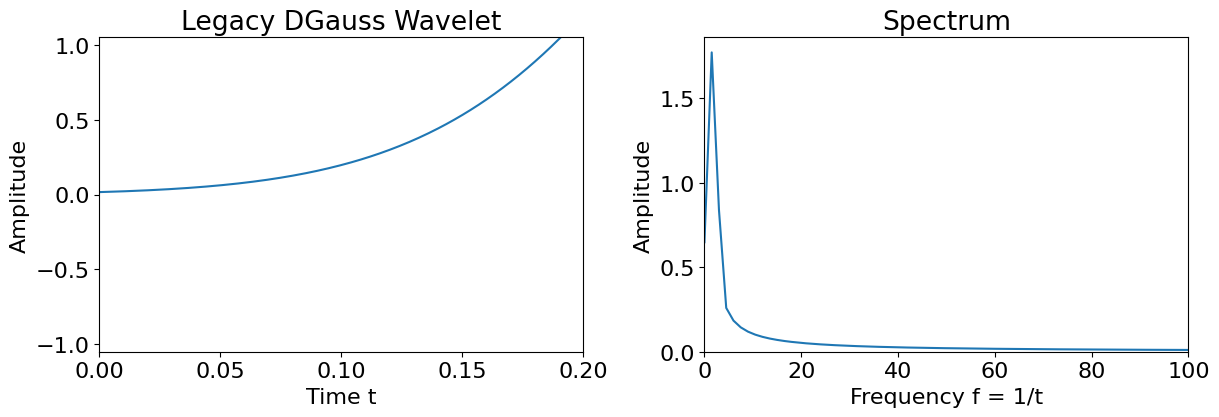

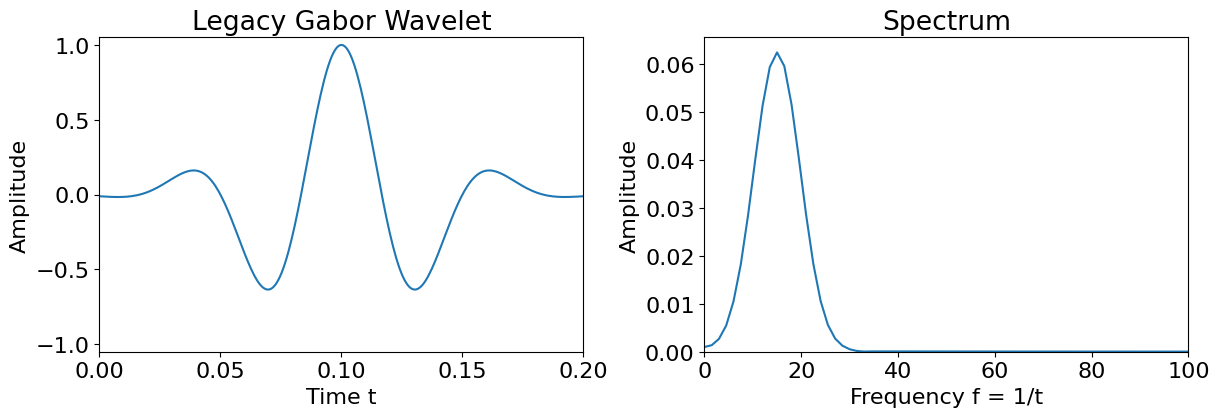

In [18]:
for wavelet in [legacy_ricker, legacy_dgauss, legacy_gabor]:
    fig, ax = plot_wavelet(time_axis.time_values, wavelet.data[:, 0])
    ax[0].set_title(f'{wavelet.name} Wavelet')

Note that DGAUSS...

And in the case of the Gabor wavelet, the spectrum clearly shows that the maximum frequency is in the wrong place.